In [1]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy.stats import linregress

<center><font size="+2">Importing and inspecting the data</font></center>

In [2]:
#data from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
#did minor preprocessing in excel to remove aggregated groups prior to importing csv

gdp_data = pd.read_csv('World GDP Data.csv')

In [3]:
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,...,1.554260e+13,1.619700e+13,1.678480e+13,1.752720e+13,1.823830e+13,1.874510e+13,1.954300e+13,2.061190e+13,2.143320e+13,2.093660e+13
1,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,...,7.551500e+12,8.532230e+12,9.570410e+12,1.047570e+13,1.106160e+13,1.123330e+13,1.231040e+13,1.389480e+13,1.427990e+13,1.472270e+13
2,Germany,DEU,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.749310e+12,3.527140e+12,3.733800e+12,3.889090e+12,3.357590e+12,3.469850e+12,3.682600e+12,3.963770e+12,3.861120e+12,3.806060e+12
3,United Kingdom,GBR,GDP (current US$),NY.GDP.MKTP.CD,7.323397e+10,7.774197e+10,8.124756e+10,8.656196e+10,9.440756e+10,1.018250e+11,...,2.659880e+12,2.704020e+12,2.783250e+12,3.065520e+12,2.932780e+12,2.693250e+12,2.662570e+12,2.857510e+12,2.830810e+12,2.707740e+12
4,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955485e+10,...,1.823050e+12,1.827640e+12,1.856720e+12,2.039130e+12,2.103590e+12,2.294800e+12,2.651470e+12,2.701110e+12,2.870500e+12,2.622980e+12


In [5]:
#inspecting the different columns

gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   Country Code    215 non-null    object 
 2   Indicator Name  215 non-null    object 
 3   Indicator Code  215 non-null    object 
 4   1960            82 non-null     float64
 5   1961            83 non-null     float64
 6   1962            98 non-null     float64
 7   1963            98 non-null     float64
 8   1964            98 non-null     float64
 9   1965            107 non-null    float64
 10  1966            109 non-null    float64
 11  1967            112 non-null    float64
 12  1968            114 non-null    float64
 13  1969            114 non-null    float64
 14  1970            119 non-null    float64
 15  1971            122 non-null    float64
 16  1972            122 non-null    float64
 17  1973            122 non-null    flo

In [6]:
#dropping unneeded columns

gdp_data.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

In [7]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  215 non-null    object 
 1   1960          82 non-null     float64
 2   1961          83 non-null     float64
 3   1962          98 non-null     float64
 4   1963          98 non-null     float64
 5   1964          98 non-null     float64
 6   1965          107 non-null    float64
 7   1966          109 non-null    float64
 8   1967          112 non-null    float64
 9   1968          114 non-null    float64
 10  1969          114 non-null    float64
 11  1970          119 non-null    float64
 12  1971          122 non-null    float64
 13  1972          122 non-null    float64
 14  1973          122 non-null    float64
 15  1974          123 non-null    float64
 16  1975          125 non-null    float64
 17  1976          126 non-null    float64
 18  1977          129 non-null    

In [12]:
#the goal of the visuals is to show country GDP share of total world GDP in two different years showing that 
#is increasing their world percentage share faster than the US

#creating a time series chart to determine two years to compare to give a good estimation of this

us_china_gdp = gdp_data.head(2)

In [13]:
us_china_gdp

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,...,1.554260e+13,1.619700e+13,1.678480e+13,1.752720e+13,1.823830e+13,1.874510e+13,1.954300e+13,2.061190e+13,2.143320e+13,2.093660e+13
1,China,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,7.084654e+10,...,7.551500e+12,8.532230e+12,9.570410e+12,1.047570e+13,1.106160e+13,1.123330e+13,1.231040e+13,1.389480e+13,1.427990e+13,1.472270e+13


In [21]:
years = us_china_gdp.columns

In [28]:
years = years.drop('Country Name')

In [17]:
us_gdp = us_china_gdp.iloc[0].squeeze()
china_gdp = us_china_gdp.iloc[1].squeeze()

In [31]:
us_gdp = us_gdp.drop('Country Name')

In [32]:
china_gdp = china_gdp.drop('Country Name')

In [30]:
type(years)

pandas.core.indexes.base.Index

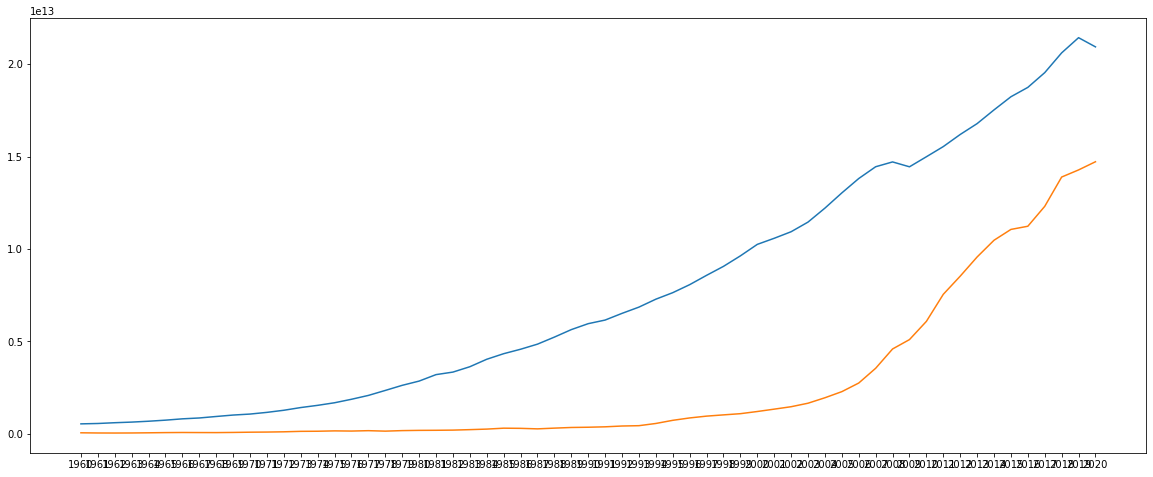

In [35]:
figure(figsize=(20,8))
plt.plot(years, us_gdp)
plt.plot(years, china_gdp)
plt.show()

In [ ]:
#looks like a comparison between 2000 and 2020 could show the story

<center><font size="+2">Plotting the chart</font></center>

In [38]:
gdp_2000 = gdp_data[['Country Name', '2000']]
gdp_2020 = gdp_data[['Country Name', '2020']]

In [44]:
#determining world GDP for 2000 and 2020

world_gdp_2000 = gdp_2000['2000'].sum()
world_gdp_2020 = gdp_2020['2020'].sum()

In [46]:
#using 2000 and 2020 world GDP to determine country world GDP share

gdp_2000_share = gdp_2000['2000']/world_gdp_2000
gdp_2020_share = gdp_2020['2020']/world_gdp_2020

In [47]:
gdp_2000['2000'] = gdp_2000_share
gdp_2020['2020'] = gdp_2020_share

<ipython-input-47-ebf4868446a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2000['2000'] = gdp_2000_share
<ipython-input-47-ebf4868446a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2020['2020'] = gdp_2020_share


In [48]:
#verifying it worked correctly

gdp_2000

,Country Name,2000
0,United States,0.310974
1,China,0.036743
2,Germany,0.059086
3,United Kingdom,0.050294
4,India,0.014207
...,...,...
210,Tonga,0.000006
211,"Venezuela, RB",0.003553
212,British Virgin Islands,NaN
213,Virgin Islands (U.S.),NaN


In [49]:
#verifying it worked correctly

gdp_2020

,Country Name,2020
0,United States,0.271043
1,China,0.190599
2,Germany,0.049273
3,United Kingdom,0.035054
4,India,0.033957
...,...,...
210,Tonga,NaN
211,"Venezuela, RB",NaN
212,British Virgin Islands,NaN
213,Virgin Islands (U.S.),NaN


In [50]:
#sorting both for highest GDP shares

gdp_2000.sort_values('2000', ascending=False, inplace=True)
gdp_2020.sort_values('2020', ascending=False, inplace=True)

<ipython-input-50-0194bdf9bf0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2000.sort_values('2000', ascending=False, inplace=True)
<ipython-input-50-0194bdf9bf0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_2020.sort_values('2020', ascending=False, inplace=True)


In [91]:
gdp_2000[0:7]

,Country Name,2000
0,United States,0.310974
191,Japan,0.148249
2,Germany,0.059086
3,United Kingdom,0.050294
5,France,0.041423
1,China,0.036743
6,Italy,0.034781


In [92]:
gdp_2020[0:7]

,Country Name,2020
0,United States,0.271043
1,China,0.190599
2,Germany,0.049273
3,United Kingdom,0.035054
4,India,0.033957
5,France,0.033698
6,Italy,0.024422


In [70]:
#pulling out top 7 countries in 2000 and 2020 to make comparison and to make sure China is included in both

top_7_2000 = gdp_2000[0:7]
top_7_2020 = gdp_2020[0:7]

In [71]:
top_7_2000.reset_index(drop=True, inplace=True)
top_7_2020.reset_index(drop=True, inplace=True)

In [72]:
top_7_2000

,Country Name,2000
0,United States,0.310974
1,Japan,0.148249
2,Germany,0.059086
3,United Kingdom,0.050294
4,France,0.041423
5,China,0.036743
6,Italy,0.034781


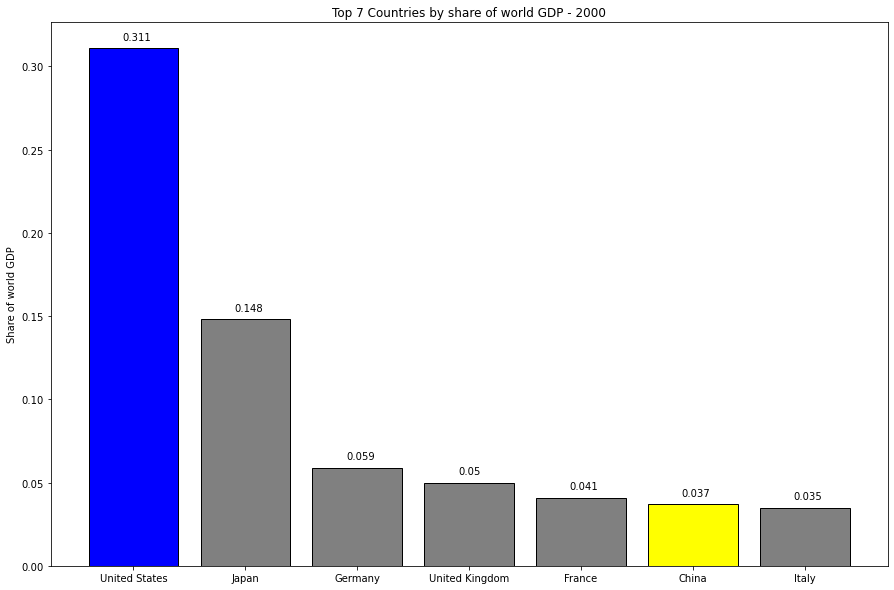

In [113]:
#creating chart for 2000

share = round(top_7_2000['2000'],3)
country = top_7_2000['Country Name']

figure(figsize=(15,10))
plt.bar(country, share, color=['blue','grey','grey','grey','grey','yellow','grey'], edgecolor='black')
plt.ylabel('Share of world GDP')
plt.title('Top 7 Countries by share of world GDP - 2000')
xlocs, xlab = plt.xticks()
for i, v in enumerate(share):
    plt.text(xlocs[i] - 0.1, v + 0.005, str(v))

plt.show()

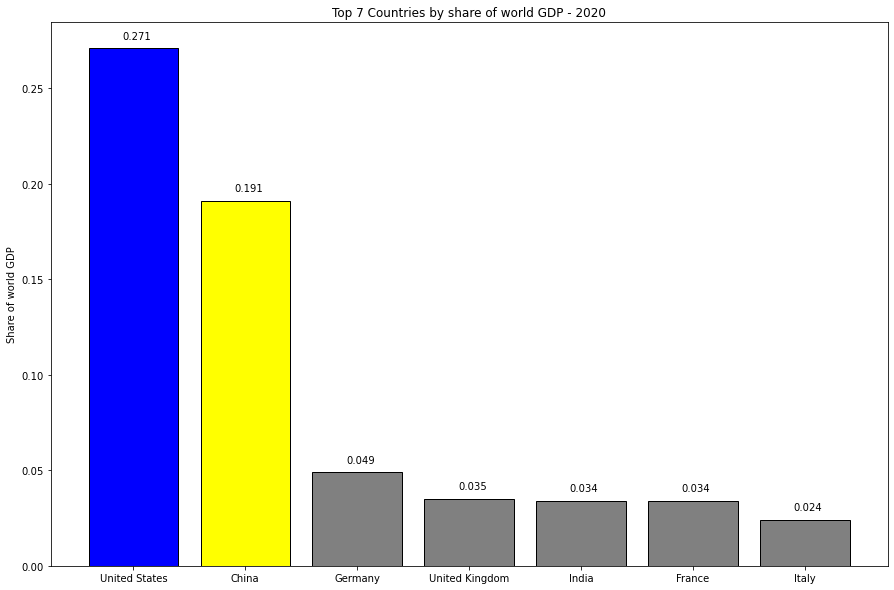

In [115]:
#creating chart for 2020

share = round(top_7_2020['2020'],3)
country = top_7_2020['Country Name']

figure(figsize=(15,10))
plt.bar(country, share, color=['blue','yellow','grey','grey','grey','grey','grey'], edgecolor='black')
plt.ylabel('Share of world GDP')
plt.title('Top 7 Countries by share of world GDP - 2020')
xlocs, xlab = plt.xticks()
for i, v in enumerate(share):
    plt.text(xlocs[i] - 0.1, v + 0.005, str(v))

plt.show()